# The Cancer Gene Atlas Cancer (TCGA) - Brain Lower Grade Glioma (LGG)

Author: Moshe Silverstein <br>
Date: 7-17 <br>
Data Source: https://cancergenome.nih.gov/

In [1]:
import sys, datetime, os
import numpy as np
import pandas as pd
import importlib
import my_functions as mf
import matplotlib.pyplot as plt
%matplotlib inline
from collections import Counter

In [2]:
import seaborn as sns
sns.set(color_codes=True)
np.random.seed(sum(map(ord, "distributions")))

In [3]:
from clustergrammer_widget import *
net = Network(clustergrammer_widget)

In [4]:
importlib.reload(mf)

<module 'my_functions' from '/Users/moshesilverstein/Documents/Harmonizome/TCGA/my_functions.py'>

# Versions Of Modules In Use

In [5]:
%load_ext version_information
%version_information numpy, pandas, clustergrammer_widget, seaborn 

Software versions
Python 3.5.2 64bit [GCC 4.2.1 Compatible Apple LLVM 4.2 (clang-425.0.28)]
IPython 5.3.0
OS Darwin 17.5.0 x86_64 i386 64bit
numpy 1.13.1
pandas 0.21.0
clustergrammer_widget 1.9.0
seaborn 0.7.1
Mon Apr 30 13:03:10 2018 EDT

# Functions

In [6]:
def getGenes(inputDF):
    
    inputDF.reset_index(inplace=True)
    
    inputDF.rename(columns={'index':'Gene Symbol'}, inplace=True)

    inputDF.set_index('Gene Symbol', inplace=True)

    lst = []

    for index in  inputDF.index:
        lst.append(index.split('|')[5])

    inputDF.index = lst

In [7]:
def getSampleID(inputDF, metaDF):
    
    lst = []
    
    for i,col in enumerate(inputDF.columns):

        progressPercent = ((i+1)/len(inputDF.columns))*100

        sys.stdout.write("Progress: %d%%  %d Out of %d   \r" % (progressPercent, (i+1), len(inputDF.columns)))
        sys.stdout.flush()

        ID = ('-').join(metaDF.loc[col, 'a_AliquotBarcode'].split('-')[0:3])
        
        ID = ID+'-'+metaDF.loc[col, 'a_AliquotBarcode'].split('-')[3][0:2]

        lst.append(ID)

        
    inputDF.columns = lst

In [8]:
def getSampleData(inputDF, metaDF, SampleTypes):
    
    lst = []

    for i,col in enumerate(inputDF.columns):

        progressPercent = ((i+1)/len(inputDF.columns))*100

        sys.stdout.write("Progress: %d%%  %d Out of %d   \r" % (progressPercent, (i+1), len(inputDF.columns)))
        sys.stdout.flush()
        
#         ID = ('-').join(meta.loc[col, 'a_AliquotBarcode'].split('-')[0:3])
        ID = ('-').join(col.split('-')[0:3])
        
        donor = 'Donor:'+ID
        
#         if '01' in str(col.split('-')[3]):
#             sampleType = 'Primary Solid Tumor'
#         elif '11' in str(col.split('-')[3]):
#             sampleType= 'Solid Tissue Normal'
        
        if ID in metaDF.index:
            info = (donor, 
                'Age:'+str(metaDF.loc[ID, 'age_at_initial_pathologic_diagnosis']),
                'Gender:'+str(metaDF.loc[ID, 'gender']),    
                'SampleType:'+SampleTypes[str(col.split('-')[3])],
                'Stage:'+str(metaDF.loc[ID, 'pathologic_stage']),
                'Histology:'+str(metaDF.loc[ID, 'histological_type']),
                'Tissue:'+str(metaDF.loc[ID, 'tumor_tissue_site']), 
                'Tumor:'+str(metaDF.loc[ID, 'tumor_type']),    
                'Grade'+str(metaDF.loc[ID, 'neoplasm_histologic_grade'])
#                 'SampleType:'+str(ID.split('-')[3])
               )
#             for col in metaDF.columns:
#                 if len(metaDF[col].dropna()) >= .5*len(metaDF[col]) and len(metaDF[col].unique()) > 2 and len(metaDF[col].unique()) < len(metaDF[col]) and 'age' not in col:
#                     info = info + (str(col)+':'+str(metaDF.loc[ID, col]),)
        lst.append(info)

        
    inputDF.columns = lst

In [9]:
SampleTypes ={
    '01':'Primary Solid Tumor',
    '02':'Recurrent Solid Tumor',
    '03':'Primary Blood Derived Cancer - Peripheral Blood',
    '04':'Recurrent Blood Derived Cancer - Bone Marrow',
    '05':'Additional - New Primary',
    '06':'Metastatic',
    '07':'Additional Metastatic',
    '08':'Human Tumor Original Cells',
    '09':'Primary Blood Derived Cancer - Bone Marrow',
    '10':'Blood Derived Normal',
    '11':'Solid Tissue Normal',
    '12':'Buccal Cell Normal',
    '13':'EBV Immortalized Normal',
    '14':'Bone Marrow Normal',
    '15':'sample type 15',
    '16':'sample type 16',
    '20':'Control Analyte',
    '40':'Recurrent Blood Derived Cancer - Peripheral Blood',
    '50':'Cell Lines',
    '60':'Primary Xenograft Tissue',
    '61':'Cell Line Derived Xenograft Tissue',
    '99':'sample type 99'
             }

# Path to Output Files

In [10]:
path = '/Users/moshesilverstein/Documents/Harmonizome/TCGA/Output/'

# Load Meta Data

In [11]:
meta = pd.read_csv('Input/TCGA_Metadata.csv', index_col=9)

In [12]:
meta.head()

,a_AliquotBarcode,b_disease,a_objectSizeBytes,b_uploaded,b_state,b_library_type,b_center,b_assembly,a_GCSobject
a_CGHubAnalysisID,,,,,,,,,
3a8e6a74-137f-468f-8987-fa0acdde2836,TCGA-CS-6188-01A-11R-1896-07,LGG,6354301047,8/14/2013,Live,RNA-Seq,UNC-LCCC,unaligned,gs://5aa919de-0aa0-43ec-9ec3-288481102b6d/tcga...
c63d44f1-c9ad-4391-b1aa-0feb3713441b,TCGA-EO-A22Y-01A-11R-A180-07,UCEC,5497637066,8/29/2013,Live,RNA-Seq,UNC-LCCC,unaligned,gs://5aa919de-0aa0-43ec-9ec3-288481102b6d/tcga...
21912089-1e42-4bcc-9ad9-fe9a9b88fb09,TCGA-94-A5I4-01A-11R-A26W-07,LUSC,4600317850,8/29/2013,Live,RNA-Seq,UNC-LCCC,unaligned,gs://5aa919de-0aa0-43ec-9ec3-288481102b6d/tcga...
6b86e544-0372-434a-9f28-6fa4075dd228,TCGA-N5-A4RV-01A-21R-A28V-07,UCS,4964387768,8/30/2013,Live,RNA-Seq,UNC-LCCC,unaligned,gs://5aa919de-0aa0-43ec-9ec3-288481102b6d/tcga...
30518eb4-2783-4988-bcd4-36a1a8bb4dfa,TCGA-BK-A56F-01A-32R-A27V-07,UCEC,5668623460,8/31/2013,Live,RNA-Seq,UNC-LCCC,unaligned,gs://5aa919de-0aa0-43ec-9ec3-288481102b6d/tcga...


In [13]:
meta.shape

(11373, 9)

# Load Sample MetaData

In [14]:
sample_meta = pd.read_csv('Input/metadata_Brain Lower Grade Glioma [LGG]', sep='\t', index_col=1)

In [15]:
sample_meta.head()

,Unnamed: 0,Study,Project,ParticipantUUID,TSSCode,age_at_initial_pathologic_diagnosis,anatomic_neoplasm_subdivision,batch_number,bcr,clinical_M,...,BMI,age_began_smoking_in_years,h_pylori_infection,other_dx,other_malignancy_anatomic_site,other_malignancy_histological_type,other_malignancy_malignancy_type,stopped_smoking_year,venous_invasion,year_of_tobacco_smoking_onset
ParticipantBarcode,,,,,,,,,,,,,,,,,,,,,
TCGA-DB-A64W,9359,LGG,TCGA,DF22BC30-96E2-42DE-9A39-2954DB49841D,DB,65.0,NaN,306,Nationwide Children's Hospital,NaN,...,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN
TCGA-DB-5275,9360,LGG,TCGA,bbfb5399-8d43-4b75-bf90-23ec142697d7,DB,36.0,NaN,78,Nationwide Children's Hospital,NaN,...,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN
TCGA-DB-5274,9361,LGG,TCGA,0b54cda4-7568-481e-b0c6-2c5c6de0026c,DB,37.0,NaN,78,Nationwide Children's Hospital,NaN,...,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN
TCGA-DB-A64V,9362,LGG,TCGA,176D89D7-F8F1-4A72-B45A-31CBE1632A30,DB,54.0,NaN,306,Nationwide Children's Hospital,NaN,...,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN
TCGA-DB-5278,9363,LGG,TCGA,010aac75-3bfe-4bf2-b866-af0f2d92f125,DB,17.0,NaN,78,Nationwide Children's Hospital,NaN,...,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
sample_meta.shape

(515, 70)

# Load Data

In [17]:
matrix = pd.read_csv('Input/TCGA_LGG_tpm.tsv', sep='\t', index_col=0)

In [18]:
matrix.head()

,3a8e6a74-137f-468f-8987-fa0acdde2836,d0612701-2aee-4608-b9e5-38dea2836ad4,fd71951d-3499-46c5-8e70-8d99cc2c5a0b,b3c18622-e32e-4403-97fc-aedc594923b1,cd1de895-9d31-46ef-bcd2-fe26ac2f0144,28269727-e59c-42fb-a2ac-bfb6cfaa6908,bdb520da-2642-470e-99b4-add29abec635,f23db39b-3844-437b-81c2-866178a1ec49,594f5194-a7bb-4c05-a0b6-caa5c95d4dda,f4329623-fde1-4b5a-9707-6f449b5e3cc3,...,ff748ba3-eeb2-4ef6-a2db-6bde5096d4fd,ee4039c7-21d2-4792-9bbd-eb8f2f0c3146,b8060e99-5893-4edc-9192-0daf1ef509ac,89ac6022-a529-4b81-93d9-fa851c8ee435,28f0157c-7fab-4d39-bcc4-6156169cfa9c,0ce1be1c-d253-49b3-8597-71bea4627dd3,c0e3c64e-5eb7-4cc3-ad2d-8334bb69e607,ce7b4223-a39a-465e-822e-4cab96ae159e,ebe0a66e-0ea2-4386-adf4-0d42a195a401,34ec162a-ca44-4c08-b358-93169ac9c9fe
ENST00000000233.9|ENSG00000004059.10|OTTHUMG00000023246.6|OTTHUMT00000059567.2|ARF5-001|ARF5|1103|protein_coding|,167.801000,125.7830,222.9670,195.6630,177.668000,150.098000,111.427000,238.0120,200.79500,126.238000,...,179.509000,132.638000,122.89500,131.845000,93.773200,188.33900,126.413000,154.15500,132.550000,122.29700
ENST00000000412.7|ENSG00000003056.7|OTTHUMG00000168276.2|OTTHUMT00000399130.1|M6PR-001|M6PR|2756|protein_coding|,39.878700,13.8869,44.5234,39.4778,27.264500,38.261400,11.069200,36.0285,21.61120,27.688000,...,4.145820,28.638400,23.19990,19.848900,27.980900,23.14960,41.273100,22.11950,43.737200,31.25380
ENST00000000442.10|ENSG00000173153.13|OTTHUMG00000150641.6|OTTHUMT00000319303.1|ESRRA-002|ESRRA|2215|protein_coding|,14.858000,28.5600,15.4434,13.8020,22.162200,10.055600,9.034670,12.5358,16.29770,19.231500,...,10.871000,13.283000,23.04250,15.676700,11.197600,11.12510,13.488800,11.53170,12.977600,13.13790
ENST00000001008.5|ENSG00000004478.7|OTTHUMG00000090429.3|OTTHUMT00000206861.2|FKBP4-001|FKBP4|3732|protein_coding|,26.099700,40.0694,63.2205,32.2005,36.632100,30.646800,42.755700,59.6865,39.29470,33.989600,...,21.095500,40.350900,42.85460,29.742700,53.527200,34.76330,31.955400,28.04750,35.370500,48.09240
ENST00000001146.6|ENSG00000003137.8|OTTHUMG00000129756.5|OTTHUMT00000251969.1|CYP26B1-001|CYP26B1|4732|protein_coding|,0.322673,0.0000,0.0000,3.6063,0.063161,0.151115,0.345173,24.4728,3.60018,0.129924,...,0.061791,0.103094,2.62751,0.479758,0.089159,5.26389,0.916696,0.62026,0.879812,2.02348


In [19]:
matrix.shape

(199169, 534)

# Get Only Protein Coding Genes

In [20]:
lst = []

for i,index in enumerate(matrix.index):
    
    progressPercent = ((i+1)/len(matrix.index)*100)

    sys.stdout.write("Progress: %d%%  %d Out of %d   \r" % (progressPercent, (i+1), len(matrix.index)))
    sys.stdout.flush()
                                 
    lst.append(index.split('|')[7])    
                       
matrix['Gene Type'] = lst

matrix = matrix[matrix['Gene Type'] == 'protein_coding']

matrix.drop('Gene Type', axis=1, inplace=True)

In [21]:
matrix.head()

,3a8e6a74-137f-468f-8987-fa0acdde2836,d0612701-2aee-4608-b9e5-38dea2836ad4,fd71951d-3499-46c5-8e70-8d99cc2c5a0b,b3c18622-e32e-4403-97fc-aedc594923b1,cd1de895-9d31-46ef-bcd2-fe26ac2f0144,28269727-e59c-42fb-a2ac-bfb6cfaa6908,bdb520da-2642-470e-99b4-add29abec635,f23db39b-3844-437b-81c2-866178a1ec49,594f5194-a7bb-4c05-a0b6-caa5c95d4dda,f4329623-fde1-4b5a-9707-6f449b5e3cc3,...,ff748ba3-eeb2-4ef6-a2db-6bde5096d4fd,ee4039c7-21d2-4792-9bbd-eb8f2f0c3146,b8060e99-5893-4edc-9192-0daf1ef509ac,89ac6022-a529-4b81-93d9-fa851c8ee435,28f0157c-7fab-4d39-bcc4-6156169cfa9c,0ce1be1c-d253-49b3-8597-71bea4627dd3,c0e3c64e-5eb7-4cc3-ad2d-8334bb69e607,ce7b4223-a39a-465e-822e-4cab96ae159e,ebe0a66e-0ea2-4386-adf4-0d42a195a401,34ec162a-ca44-4c08-b358-93169ac9c9fe
ENST00000000233.9|ENSG00000004059.10|OTTHUMG00000023246.6|OTTHUMT00000059567.2|ARF5-001|ARF5|1103|protein_coding|,167.801000,125.7830,222.9670,195.6630,177.668000,150.098000,111.427000,238.0120,200.79500,126.238000,...,179.509000,132.638000,122.89500,131.845000,93.773200,188.33900,126.413000,154.15500,132.550000,122.29700
ENST00000000412.7|ENSG00000003056.7|OTTHUMG00000168276.2|OTTHUMT00000399130.1|M6PR-001|M6PR|2756|protein_coding|,39.878700,13.8869,44.5234,39.4778,27.264500,38.261400,11.069200,36.0285,21.61120,27.688000,...,4.145820,28.638400,23.19990,19.848900,27.980900,23.14960,41.273100,22.11950,43.737200,31.25380
ENST00000000442.10|ENSG00000173153.13|OTTHUMG00000150641.6|OTTHUMT00000319303.1|ESRRA-002|ESRRA|2215|protein_coding|,14.858000,28.5600,15.4434,13.8020,22.162200,10.055600,9.034670,12.5358,16.29770,19.231500,...,10.871000,13.283000,23.04250,15.676700,11.197600,11.12510,13.488800,11.53170,12.977600,13.13790
ENST00000001008.5|ENSG00000004478.7|OTTHUMG00000090429.3|OTTHUMT00000206861.2|FKBP4-001|FKBP4|3732|protein_coding|,26.099700,40.0694,63.2205,32.2005,36.632100,30.646800,42.755700,59.6865,39.29470,33.989600,...,21.095500,40.350900,42.85460,29.742700,53.527200,34.76330,31.955400,28.04750,35.370500,48.09240
ENST00000001146.6|ENSG00000003137.8|OTTHUMG00000129756.5|OTTHUMT00000251969.1|CYP26B1-001|CYP26B1|4732|protein_coding|,0.322673,0.0000,0.0000,3.6063,0.063161,0.151115,0.345173,24.4728,3.60018,0.129924,...,0.061791,0.103094,2.62751,0.479758,0.089159,5.26389,0.916696,0.62026,0.879812,2.02348


In [22]:
matrix.shape

(79930, 534)

# Map Sample Meta Data to Sample ID

In [23]:
getSampleID(matrix, meta)

In [24]:
matrix.head()

,TCGA-CS-6188-01,TCGA-P5-A5F6-01,TCGA-DU-A5TU-01,TCGA-HT-A5RA-01,TCGA-DU-A5TW-01,TCGA-DU-A5TY-01,TCGA-DU-A5TS-01,TCGA-FG-8189-01,TCGA-HT-A5R7-01,TCGA-DB-A4XD-01,...,TCGA-VW-A8FI-01,TCGA-QH-A870-01,TCGA-RY-A83X-01,TCGA-RY-A847-01,TCGA-TQ-A7RK-02,TCGA-HT-A61A-01,TCGA-DH-A66G-01,TCGA-QH-A6CS-01,TCGA-CS-6665-01,TCGA-DU-5851-01
ENST00000000233.9|ENSG00000004059.10|OTTHUMG00000023246.6|OTTHUMT00000059567.2|ARF5-001|ARF5|1103|protein_coding|,167.801000,125.7830,222.9670,195.6630,177.668000,150.098000,111.427000,238.0120,200.79500,126.238000,...,179.509000,132.638000,122.89500,131.845000,93.773200,188.33900,126.413000,154.15500,132.550000,122.29700
ENST00000000412.7|ENSG00000003056.7|OTTHUMG00000168276.2|OTTHUMT00000399130.1|M6PR-001|M6PR|2756|protein_coding|,39.878700,13.8869,44.5234,39.4778,27.264500,38.261400,11.069200,36.0285,21.61120,27.688000,...,4.145820,28.638400,23.19990,19.848900,27.980900,23.14960,41.273100,22.11950,43.737200,31.25380
ENST00000000442.10|ENSG00000173153.13|OTTHUMG00000150641.6|OTTHUMT00000319303.1|ESRRA-002|ESRRA|2215|protein_coding|,14.858000,28.5600,15.4434,13.8020,22.162200,10.055600,9.034670,12.5358,16.29770,19.231500,...,10.871000,13.283000,23.04250,15.676700,11.197600,11.12510,13.488800,11.53170,12.977600,13.13790
ENST00000001008.5|ENSG00000004478.7|OTTHUMG00000090429.3|OTTHUMT00000206861.2|FKBP4-001|FKBP4|3732|protein_coding|,26.099700,40.0694,63.2205,32.2005,36.632100,30.646800,42.755700,59.6865,39.29470,33.989600,...,21.095500,40.350900,42.85460,29.742700,53.527200,34.76330,31.955400,28.04750,35.370500,48.09240
ENST00000001146.6|ENSG00000003137.8|OTTHUMG00000129756.5|OTTHUMT00000251969.1|CYP26B1-001|CYP26B1|4732|protein_coding|,0.322673,0.0000,0.0000,3.6063,0.063161,0.151115,0.345173,24.4728,3.60018,0.129924,...,0.061791,0.103094,2.62751,0.479758,0.089159,5.26389,0.916696,0.62026,0.879812,2.02348


# Map Gene Symbol to Gene ID

In [25]:
getGenes(matrix)

In [26]:
matrix.head()

,TCGA-CS-6188-01,TCGA-P5-A5F6-01,TCGA-DU-A5TU-01,TCGA-HT-A5RA-01,TCGA-DU-A5TW-01,TCGA-DU-A5TY-01,TCGA-DU-A5TS-01,TCGA-FG-8189-01,TCGA-HT-A5R7-01,TCGA-DB-A4XD-01,...,TCGA-VW-A8FI-01,TCGA-QH-A870-01,TCGA-RY-A83X-01,TCGA-RY-A847-01,TCGA-TQ-A7RK-02,TCGA-HT-A61A-01,TCGA-DH-A66G-01,TCGA-QH-A6CS-01,TCGA-CS-6665-01,TCGA-DU-5851-01
ARF5,167.801000,125.7830,222.9670,195.6630,177.668000,150.098000,111.427000,238.0120,200.79500,126.238000,...,179.509000,132.638000,122.89500,131.845000,93.773200,188.33900,126.413000,154.15500,132.550000,122.29700
M6PR,39.878700,13.8869,44.5234,39.4778,27.264500,38.261400,11.069200,36.0285,21.61120,27.688000,...,4.145820,28.638400,23.19990,19.848900,27.980900,23.14960,41.273100,22.11950,43.737200,31.25380
ESRRA,14.858000,28.5600,15.4434,13.8020,22.162200,10.055600,9.034670,12.5358,16.29770,19.231500,...,10.871000,13.283000,23.04250,15.676700,11.197600,11.12510,13.488800,11.53170,12.977600,13.13790
FKBP4,26.099700,40.0694,63.2205,32.2005,36.632100,30.646800,42.755700,59.6865,39.29470,33.989600,...,21.095500,40.350900,42.85460,29.742700,53.527200,34.76330,31.955400,28.04750,35.370500,48.09240
CYP26B1,0.322673,0.0000,0.0000,3.6063,0.063161,0.151115,0.345173,24.4728,3.60018,0.129924,...,0.061791,0.103094,2.62751,0.479758,0.089159,5.26389,0.916696,0.62026,0.879812,2.02348


# Histogram of First Sample

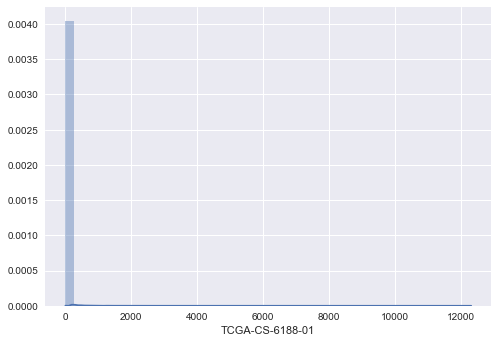

In [27]:
sns.distplot(matrix.iloc[:, 0]);

# Histogram of First Gene

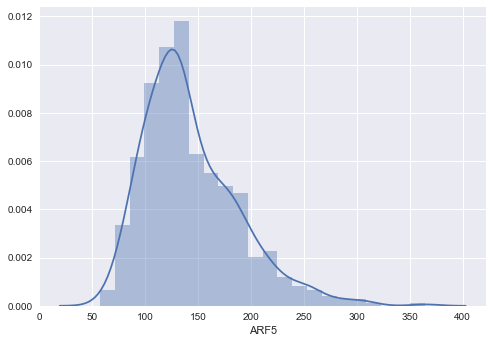

In [28]:
sns.distplot(matrix.iloc[0, :]);

# Save Unfiltered Matrix to File

In [29]:
filename = path+'tcga_lgg_matrix_unfilltered_%s.tsv.zip'% str(datetime.date.today())[0:7].replace('-', '_')
matrix.to_csv(filename, sep='\t', compression='gzip')

# Filtered

In [30]:
normalized_matrix = matrix.copy()

In [31]:
normalized_matrix = normalized_matrix.groupby(level=0).max()

# Remove any data with more than 95% missing and imput remaining mssing values to matrix mean

In [32]:
normalized_matrix = mf.removeAndImpute(normalized_matrix)

In [33]:
normalized_matrix.head()

,TCGA-CS-6188-01,TCGA-P5-A5F6-01,TCGA-DU-A5TU-01,TCGA-HT-A5RA-01,TCGA-DU-A5TW-01,TCGA-DU-A5TY-01,TCGA-DU-A5TS-01,TCGA-FG-8189-01,TCGA-HT-A5R7-01,TCGA-DB-A4XD-01,...,TCGA-VW-A8FI-01,TCGA-QH-A870-01,TCGA-RY-A83X-01,TCGA-RY-A847-01,TCGA-TQ-A7RK-02,TCGA-HT-A61A-01,TCGA-DH-A66G-01,TCGA-QH-A6CS-01,TCGA-CS-6665-01,TCGA-DU-5851-01
A1BG,0.305529,0.083222,0.083222,0.083222,0.077007,0.083222,0.114139,0.083222,0.083222,0.083222,...,0.093648,0.083222,0.063265,0.083222,0.083222,0.083222,0.033746,0.580759,0.083222,0.02727
A1CF,0.012653,0.064251,0.005000,0.006656,0.018117,0.006101,0.002602,0.014512,0.020410,0.007571,...,0.008770,0.038215,0.016200,0.009337,0.019259,0.021513,0.018368,0.037712,0.023438,0.01972
A2M,276.585000,45.957800,348.539000,153.258000,113.315000,289.852000,91.815700,57.785800,73.799600,151.638000,...,64.807400,78.369000,129.635000,178.911000,255.760000,76.713200,186.955000,133.889000,504.801000,140.12800
A2ML1,0.839444,0.106893,2.387280,4.820100,0.580161,0.728769,0.333118,0.870996,1.314410,1.554240,...,0.525227,3.814570,1.557510,0.697739,0.479857,0.933918,1.692370,5.437900,0.368539,1.42922
A3GALT2,0.246064,0.051038,0.069925,0.087268,0.240042,0.050810,0.131144,0.128041,0.131144,0.239169,...,0.338164,0.057347,0.044084,0.052071,0.069355,0.059169,0.233207,0.027087,0.154818,0.06329


In [34]:
normalized_matrix.shape

(19006, 534)

# logCPM Transform

Raw counts were normalized to log10-Counts Per Million (logCPM) by dividing each column by the total sum of its counts, multiplying it by 106, followed by the application of a log10-transform.

In [35]:
samples = normalized_matrix.columns.tolist()

In [36]:
normalized_matrix.columns = np.arange(0, len(normalized_matrix.columns))

In [37]:
for col in normalized_matrix.columns:

    total = normalized_matrix[col].sum()
    
    normalized_matrix[col] = normalized_matrix[col].apply(lambda x: np.log10(((x)/total)*10**6))

In [38]:
normalized_matrix.columns = samples

In [39]:
normalized_matrix.head()

,TCGA-CS-6188-01,TCGA-P5-A5F6-01,TCGA-DU-A5TU-01,TCGA-HT-A5RA-01,TCGA-DU-A5TW-01,TCGA-DU-A5TY-01,TCGA-DU-A5TS-01,TCGA-FG-8189-01,TCGA-HT-A5R7-01,TCGA-DB-A4XD-01,...,TCGA-VW-A8FI-01,TCGA-QH-A870-01,TCGA-RY-A83X-01,TCGA-RY-A847-01,TCGA-TQ-A7RK-02,TCGA-HT-A61A-01,TCGA-DH-A66G-01,TCGA-QH-A6CS-01,TCGA-CS-6665-01,TCGA-DU-5851-01
A1BG,-0.325670,-0.925621,-0.885036,-0.867174,-0.910855,-0.889019,-0.760750,-0.881253,-0.884701,-0.890864,...,-0.822663,-0.888436,-0.987268,-0.880332,-0.855562,-0.903329,-1.281751,-0.072679,-0.896877,-1.377526
A1CF,-1.708532,-1.037976,-2.106280,-1.964174,-1.539307,-2.023876,-2.402805,-1.639762,-1.495099,-1.931953,...,-1.851176,-1.226437,-1.578921,-1.830348,-1.491156,-1.490859,-1.545906,-1.260199,-1.447184,-1.518309
A2M,2.631106,1.816501,2.736979,2.398012,2.256904,2.652921,2.144733,1.960331,2.063117,2.369708,...,2.017464,2.085472,2.324289,2.452069,2.632034,2.061305,2.461762,2.290070,2.886006,2.333309
A2ML1,0.113269,-0.816909,0.572631,0.895645,-0.033835,0.053335,-0.295586,0.138527,0.313793,0.380418,...,-0.073814,0.772773,0.403998,0.043125,-0.094687,0.146743,0.418520,0.898757,-0.250631,0.341883
A3GALT2,-0.419674,-1.137965,-0.960640,-0.846558,-0.417096,-1.103310,-0.700434,-0.694141,-0.687188,-0.432396,...,-0.265034,-1.050159,-1.144148,-1.083972,-0.934722,-1.051469,-0.442234,-1.403914,-0.627293,-1.011881


# Normalize Matrix (Quantile Normalize the matrix for the columns)

In [40]:
normalized_matrix = mf.quantileNormalize(normalized_matrix)

In [41]:
normalized_matrix.head()

,TCGA-CS-6188-01,TCGA-P5-A5F6-01,TCGA-DU-A5TU-01,TCGA-HT-A5RA-01,TCGA-DU-A5TW-01,TCGA-DU-A5TY-01,TCGA-DU-A5TS-01,TCGA-FG-8189-01,TCGA-HT-A5R7-01,TCGA-DB-A4XD-01,...,TCGA-VW-A8FI-01,TCGA-QH-A870-01,TCGA-RY-A83X-01,TCGA-RY-A847-01,TCGA-TQ-A7RK-02,TCGA-HT-A61A-01,TCGA-DH-A66G-01,TCGA-QH-A6CS-01,TCGA-CS-6665-01,TCGA-DU-5851-01
A1BG,-0.364484,-0.685587,-0.891765,-0.940549,-0.909896,-0.957484,-0.669764,-1.023801,-0.987995,-0.880564,...,-0.807785,-0.873712,-0.986432,-0.880258,-0.934755,-1.003984,-1.386669,0.032506,-0.862489,-1.362161
A1CF,-1.735839,-0.818424,-2.164187,-2.023658,-1.543854,-2.096711,-2.164187,-1.756719,-1.593363,-2.019363,...,-1.869021,-1.234555,-1.566549,-1.853359,-1.605019,-1.559265,-1.676054,-1.216571,-1.404166,-1.496939
A2M,2.539238,1.961653,2.712794,2.255121,2.298081,2.631692,2.327155,1.880522,2.034150,2.388391,...,2.075247,2.084415,2.319082,2.509654,2.645664,2.075688,2.435431,2.332157,2.843916,2.360912
A2ML1,0.013097,-0.553477,0.603472,0.750888,0.007139,-0.080172,-0.134999,-0.001982,0.186978,0.386346,...,-0.030948,0.788040,0.379512,0.033313,-0.153248,0.034673,0.251647,1.011500,-0.246469,0.271082
A3GALT2,-0.444423,-0.942723,-0.972572,-0.920862,-0.390293,-1.156999,-0.598727,-0.850783,-0.813732,-0.406038,...,-0.237053,-1.040429,-1.140928,-1.085796,-1.003677,-1.133763,-0.608062,-1.360077,-0.600401,-1.030394


# Normalize Matrix (z-score the rows)

In [42]:
mf.zscore(normalized_matrix, 'row')

In [43]:
normalized_matrix.head()

,TCGA-CS-6188-01,TCGA-P5-A5F6-01,TCGA-DU-A5TU-01,TCGA-HT-A5RA-01,TCGA-DU-A5TW-01,TCGA-DU-A5TY-01,TCGA-DU-A5TS-01,TCGA-FG-8189-01,TCGA-HT-A5R7-01,TCGA-DB-A4XD-01,...,TCGA-VW-A8FI-01,TCGA-QH-A870-01,TCGA-RY-A83X-01,TCGA-RY-A847-01,TCGA-TQ-A7RK-02,TCGA-HT-A61A-01,TCGA-DH-A66G-01,TCGA-QH-A6CS-01,TCGA-CS-6665-01,TCGA-DU-5851-01
A1BG,5.789898,2.336322,0.118813,-0.405881,-0.076200,-0.588023,2.506511,-1.301284,-0.916178,0.239276,...,1.022041,0.312976,-0.899367,0.242574,-0.343567,-1.088144,-5.204060,10.059664,0.433681,-4.940468
A1CF,-0.401327,2.846917,-1.917954,-1.420391,0.278425,-1.679047,-1.917954,-0.475255,0.103132,-1.405185,...,-0.872876,1.373544,0.198072,-0.817424,0.061863,0.223859,-0.189649,1.437219,0.773011,0.444533
A2M,0.743649,-1.586636,1.443866,-0.402631,-0.229308,1.116657,-0.112006,-1.913962,-1.294145,0.135052,...,-1.128337,-1.091350,-0.144578,0.624291,1.173030,-1.126558,0.324835,-0.091827,1.972886,0.024188
A2ML1,-0.456026,-2.216106,1.377998,1.835949,-0.474535,-0.745767,-0.916090,-0.502867,0.084143,0.703486,...,-0.592852,1.951363,0.682258,-0.393224,-0.972781,-0.388999,0.285040,2.645550,-1.262377,0.345414
A3GALT2,1.009823,-0.372806,-0.455628,-0.312150,1.160019,-0.967357,0.581676,-0.117702,-0.014895,1.116331,...,1.585213,-0.643911,-0.922765,-0.769791,-0.541935,-0.902886,0.555775,-1.530836,0.577032,-0.616068


# Merge Like Column (by taking the mean)

In [44]:
normalized_matrix = mf.merge(normalized_matrix, 'column', 'mean')

In [45]:
normalized_matrix.shape

(19006, 530)

# Map Gene Symbols To Up-to-date Approved Gene Symbols

In [46]:
mf.mapgenesymbols(normalized_matrix)

In [47]:
normalized_matrix.shape

# Merge Duplicate Genes By Rows

In [48]:
normalized_matrix = mf.merge(normalized_matrix, 'row', 'mean')

In [49]:
normalized_matrix.shape

(18480, 530)

# Histogram of First Sample

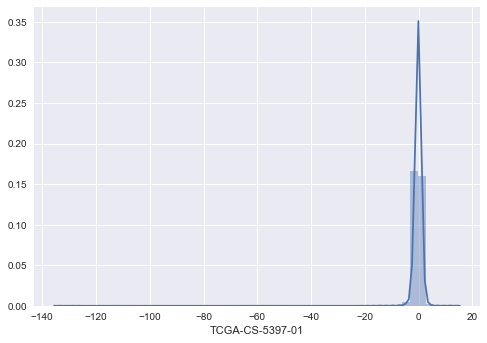

In [50]:
sns.distplot(normalized_matrix.iloc[:, 10]);

# Histogram of First Gene

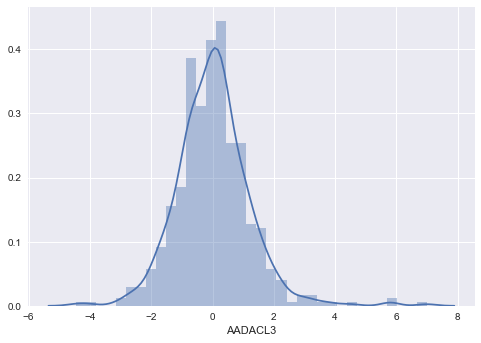

In [51]:
sns.distplot(normalized_matrix.iloc[10, :]);

# Save Filtered Matrix

In [52]:
filename = path+'tcga_lgg_matrix_filltered_%s.tsv.zip'% str(datetime.date.today())[0:7].replace('-', '_')
normalized_matrix.to_csv(filename, sep='\t', compression='gzip')

# Create Gene List

In [53]:
gene_list = mf.createGeneList(normalized_matrix)

In [54]:
gene_list.head()

,GeneSym,GeneID
0,A1BG,1
1,A1CF,29974
2,A2M,2
3,A2ML1,144568
4,A3GALT2,127550


In [55]:
gene_list.shape

(18480, 2)

# Save Gene List

In [56]:
filename = path+'tcga_lgg_gene_list_%s.tsv.zip'% str(datetime.date.today())[0:7].replace('-', '_')
gene_list.to_csv(filename, sep='\t', compression='gzip')

# Create Attribute List

In [57]:
metaData = pd.DataFrame(index=normalized_matrix.columns)

for index in metaData.index:
    if ('-').join(index.split('-')[0:3]) in sample_meta.index:
        metaData.loc[index, 'Age'] = sample_meta.loc[('-').join(index.split('-')[0:3]), 'age_at_initial_pathologic_diagnosis']
        metaData.loc[index, 'Gender'] = sample_meta.loc[('-').join(index.split('-')[0:3]), 'gender']
        metaData.loc[index, 'Pathologic M'] = sample_meta.loc[('-').join(index.split('-')[0:3]), 'pathologic_M']
        metaData.loc[index, 'Pathologic N'] = sample_meta.loc[('-').join(index.split('-')[0:3]), 'pathologic_N']
        metaData.loc[index, 'Pathologic T'] = sample_meta.loc[('-').join(index.split('-')[0:3]), 'pathologic_T']
        metaData.loc[index, 'Pathologic Stage'] = sample_meta.loc[('-').join(index.split('-')[0:3]), 'pathologic_stage']
        metaData.loc[index, 'Histological Type'] = sample_meta.loc[('-').join(index.split('-')[0:3]), 'histological_type']
        metaData.loc[index, 'Sample Type'] = SampleTypes[str(index.split('-')[3])]
        metaData.loc[index, 'Tumor Tissue Site'] = sample_meta.loc[('-').join(index.split('-')[0:3]), 'tumor_tissue_site']
        metaData.loc[index, 'Neoplasm Histologic Grade'] = sample_meta.loc[('-').join(index.split('-')[0:3]), 'neoplasm_histologic_grade']
    else:
        metaData.loc[index, 'Age'] = np.nan
        metaData.loc[index, 'Gender'] = np.nan
        metaData.loc[index, 'Pathologic M'] = np.nan
        metaData.loc[index, 'Pathologic N'] = np.nan
        metaData.loc[index, 'Pathologic T'] = np.nan
        metaData.loc[index, 'Pathologic Stage'] = np.nan
        metaData.loc[index, 'Histological Type'] = np.nan
        metaData.loc[index, 'Sample Type'] = SampleTypes[str(index.split('-')[3])]
        metaData.loc[index, 'Tumor Tissue Site'] = np.nan
        metaData.loc[index, 'Neoplasm Histologic Grade'] = np.nan

In [58]:
attribute_list = mf.createAttributeList(normalized_matrix, metaData)

In [59]:
attribute_list.head()

,Age,Gender,Pathologic M,Pathologic N,Pathologic T,Pathologic Stage,Histological Type,Sample Type,Tumor Tissue Site,Neoplasm Histologic Grade
Attributes,,,,,,,,,,
TCGA-CS-4938-01,31,FEMALE,NaN,NaN,NaN,NaN,Astrocytoma,Primary Solid Tumor,Central nervous system,G2
TCGA-CS-4941-01,67,MALE,NaN,NaN,NaN,NaN,Astrocytoma,Primary Solid Tumor,Central nervous system,G3
TCGA-CS-4942-01,44,FEMALE,NaN,NaN,NaN,NaN,Astrocytoma,Primary Solid Tumor,Central nervous system,G3
TCGA-CS-4943-01,37,MALE,NaN,NaN,NaN,NaN,Astrocytoma,Primary Solid Tumor,Central nervous system,G3
TCGA-CS-4944-01,50,MALE,NaN,NaN,NaN,NaN,Astrocytoma,Primary Solid Tumor,Central nervous system,G2


In [60]:
attribute_list.shape

(530, 10)

# Save Attribute List

In [61]:
filename = path+'tcga_lgg_attribute_list_%s.tsv.zip'% str(datetime.date.today())[0:7].replace('-', '_')
attribute_list.to_csv(filename, sep='\t', compression='gzip')

# Create matrix of Standardized values (values between -1, and 1)

In [62]:
standard_matrix = mf.createStandardizedMatrix(normalized_matrix)

In [63]:
standard_matrix.head()

,TCGA-CS-4938-01,TCGA-CS-4941-01,TCGA-CS-4942-01,TCGA-CS-4943-01,TCGA-CS-4944-01,TCGA-CS-5390-01,TCGA-CS-5393-01,TCGA-CS-5394-01,TCGA-CS-5395-01,TCGA-CS-5396-01,...,TCGA-VW-A8FI-01,TCGA-W9-A837-01,TCGA-WH-A86K-01,TCGA-WY-A858-01,TCGA-WY-A859-01,TCGA-WY-A85A-01,TCGA-WY-A85B-01,TCGA-WY-A85C-01,TCGA-WY-A85D-01,TCGA-WY-A85E-01
,,,,,,,,,,,,,,,,,,,,,
A1BG,-0.629993,0.974176,0.603764,-0.988062,0.906181,-0.686538,-0.856222,0.830584,0.577330,0.516919,...,0.690756,-0.769477,0.898616,0.849490,-0.354710,0.263971,-0.675201,0.607527,0.494208,-0.712931
A1CF,0.014550,-0.875340,-0.977070,-0.931875,0.414690,0.252364,-0.373820,0.732027,0.154203,-0.324820,...,-0.585009,-0.034452,-0.735845,-0.577467,0.407097,0.127733,-0.581238,0.407097,0.225871,0.709327
A2M,0.237348,0.664026,0.671628,0.184428,-0.415327,0.229717,0.588439,-0.049486,0.010851,-0.253106,...,-0.773458,-0.603834,-0.004228,0.932397,-0.879048,-0.260664,0.754758,0.105145,-0.045713,-0.720679
A2ML1,0.413671,0.885994,0.274013,0.651642,0.372100,-0.054278,0.047542,-0.024154,0.980439,-0.721765,...,-0.442775,0.496718,0.882200,-0.853721,0.474050,0.761255,-0.601131,-0.729315,0.670536,0.058892
A3GALT2,0.695255,0.098514,-0.568925,0.166519,-0.101333,-0.655662,0.090987,0.600716,0.151428,-0.580237,...,0.914460,-0.252170,-0.029705,0.559155,-0.237097,-0.074933,0.910685,0.733025,0.823711,0.959791


# Plot of A Single Celltype, Normalized Value vs. Standardized Value

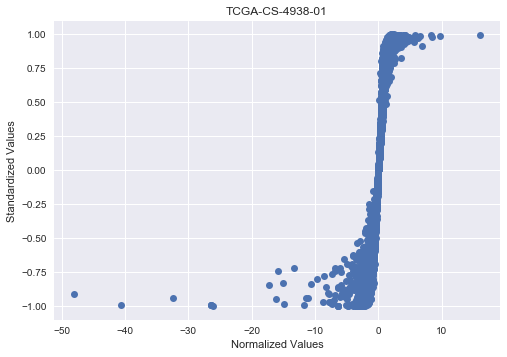

In [64]:
plt.plot(normalized_matrix[normalized_matrix.columns[0]], standard_matrix[standard_matrix.columns[0]], 'bo')
plt.xlabel('Normalized Values')
plt.ylabel('Standardized Values')
plt.title(standard_matrix.columns[0])
plt.grid(True)

# Save Standardized Matrix

In [65]:
filename = path+'tcga_lgg_standard_matrix_%s.tsv.zip'% str(datetime.date.today())[0:7].replace('-', '_')
standard_matrix.to_csv(filename, sep='\t', compression='gzip')

# Create Tertiary Matrix

In [66]:
tertiary_matrix = mf.createTertiaryMatrix(standard_matrix)

In [67]:
tertiary_matrix.head()

,TCGA-CS-4938-01,TCGA-CS-4941-01,TCGA-CS-4942-01,TCGA-CS-4943-01,TCGA-CS-4944-01,TCGA-CS-5390-01,TCGA-CS-5393-01,TCGA-CS-5394-01,TCGA-CS-5395-01,TCGA-CS-5396-01,...,TCGA-VW-A8FI-01,TCGA-W9-A837-01,TCGA-WH-A86K-01,TCGA-WY-A858-01,TCGA-WY-A859-01,TCGA-WY-A85A-01,TCGA-WY-A85B-01,TCGA-WY-A85C-01,TCGA-WY-A85D-01,TCGA-WY-A85E-01
,,,,,,,,,,,,,,,,,,,,,
A1BG,0,1,0,-1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A1CF,0,0,-1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A2M,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A2ML1,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
A3GALT2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


# Save Teriary Matrix

In [68]:
filename = path+'tcga_lgg_tertiary_matrix_%s.tsv.zip'% str(datetime.date.today())[0:7].replace('-', '_')
tertiary_matrix.to_csv(filename, sep='\t', compression='gzip')

# Create Up Gene Set Library

In [69]:
name = 'tcga_lgg_gene_up_set'

In [70]:
mf.createUpGeneSetLib(tertiary_matrix, path, name)

# Create Down Gene Set Library

In [71]:
name = 'tcga_lgg_gene_down_set'

In [72]:
mf.createDownGeneSetLib(tertiary_matrix, path, name)

# Create Up Attribute Library

In [73]:
name = 'tcga_lgg_attribute_up_set'

In [74]:
mf.createUpAttributeSetLib(tertiary_matrix, path, name)

# Create Down Attribute Library

In [75]:
name = 'tcga_lgg_attribute_down_set'

In [76]:
mf.createDownAttributeSetLib(tertiary_matrix, path, name)

# Create Attribute Similarity matrix

In [77]:
attribute_normalized_matrix = normalized_matrix.copy()

In [78]:
getSampleData(attribute_normalized_matrix, sample_meta, SampleTypes)

In [79]:
attribute_similarity_matix = mf.createSimilarityMatrix(attribute_normalized_matrix.T, 'cosine')

In [80]:
attribute_similarity_matix.head()

,"(Donor:TCGA-CS-4938, Age:31.0, Gender:FEMALE, SampleType:Primary Solid Tumor, Stage:nan, Histology:Astrocytoma, Tissue:Central nervous system, Tumor:nan, GradeG2)","(Donor:TCGA-CS-4941, Age:67.0, Gender:MALE, SampleType:Primary Solid Tumor, Stage:nan, Histology:Astrocytoma, Tissue:Central nervous system, Tumor:nan, GradeG3)","(Donor:TCGA-CS-4942, Age:44.0, Gender:FEMALE, SampleType:Primary Solid Tumor, Stage:nan, Histology:Astrocytoma, Tissue:Central nervous system, Tumor:nan, GradeG3)","(Donor:TCGA-CS-4943, Age:37.0, Gender:MALE, SampleType:Primary Solid Tumor, Stage:nan, Histology:Astrocytoma, Tissue:Central nervous system, Tumor:nan, GradeG3)","(Donor:TCGA-CS-4944, Age:50.0, Gender:MALE, SampleType:Primary Solid Tumor, Stage:nan, Histology:Astrocytoma, Tissue:Central nervous system, Tumor:nan, GradeG2)","(Donor:TCGA-CS-5390, Age:47.0, Gender:FEMALE, SampleType:Primary Solid Tumor, Stage:nan, Histology:Oligodendroglioma, Tissue:Central nervous system, Tumor:nan, GradeG2)","(Donor:TCGA-CS-5393, Age:39.0, Gender:MALE, SampleType:Primary Solid Tumor, Stage:nan, Histology:Astrocytoma, Tissue:Central nervous system, Tumor:nan, GradeG3)","(Donor:TCGA-CS-5394, Age:40.0, Gender:MALE, SampleType:Primary Solid Tumor, Stage:nan, Histology:Astrocytoma, Tissue:Central nervous system, Tumor:nan, GradeG3)","(Donor:TCGA-CS-5395, Age:43.0, Gender:MALE, SampleType:Primary Solid Tumor, Stage:nan, Histology:Oligodendroglioma, Tissue:Central nervous system, Tumor:nan, GradeG2)","(Donor:TCGA-CS-5396, Age:53.0, Gender:FEMALE, SampleType:Primary Solid Tumor, Stage:nan, Histology:Oligodendroglioma, Tissue:Central nervous system, Tumor:nan, GradeG3)",...,"(Donor:TCGA-VW-A8FI, Age:66.0, Gender:MALE, SampleType:Primary Solid Tumor, Stage:nan, Histology:Astrocytoma, Tissue:Central nervous system, Tumor:nan, GradeG3)","(Donor:TCGA-W9-A837, Age:47.0, Gender:MALE, SampleType:Primary Solid Tumor, Stage:nan, Histology:Oligodendroglioma, Tissue:Central nervous system, Tumor:nan, GradeG2)","(Donor:TCGA-WH-A86K, Age:65.0, Gender:MALE, SampleType:Primary Solid Tumor, Stage:nan, Histology:Astrocytoma, Tissue:Central nervous system, Tumor:nan, GradeG2)","(Donor:TCGA-WY-A858, Age:32.0, Gender:FEMALE, SampleType:Primary Solid Tumor, Stage:nan, Histology:Astrocytoma, Tissue:Central nervous system, Tumor:nan, GradeG3)","(Donor:TCGA-WY-A859, Age:34.0, Gender:FEMALE, SampleType:Primary Solid Tumor, Stage:nan, Histology:Astrocytoma, Tissue:Central nervous system, Tumor:nan, GradeG2)","(Donor:TCGA-WY-A85A, Age:20.0, Gender:MALE, SampleType:Primary Solid Tumor, Stage:nan, Histology:Astrocytoma, Tissue:Central nervous system, Tumor:nan, GradeG2)","(Donor:TCGA-WY-A85B, Age:24.0, Gender:MALE, SampleType:Primary Solid Tumor, Stage:nan, Histology:Astrocytoma, Tissue:Central nervous system, Tumor:nan, GradeG2)","(Donor:TCGA-WY-A85C, Age:36.0, Gender:MALE, SampleType:Primary Solid Tumor, Stage:nan, Histology:Astrocytoma, Tissue:Central nervous system, Tumor:nan, GradeG2)","(Donor:TCGA-WY-A85D, Age:60.0, Gender:MALE, SampleType:Primary Solid Tumor, Stage:nan, Histology:Oligoastrocytoma, Tissue:Central nervous system, Tumor:nan, GradeG2)","(Donor:TCGA-WY-A85E, Age:48.0, Gender:FEMALE, SampleType:Primary Solid Tumor, Stage:nan, Histology:Oligoastrocytoma, Tissue:Central nervous system, Tumor:nan, GradeG2)"
,,,,,,,,,,,,,,,,,,,,,
"(Donor:TCGA-CS-4938, Age:31.0, Gender:FEMALE, SampleType:Primary Solid Tumor, Stage:nan, Histology:Astrocytoma, Tissue:Central nervous system, Tumor:nan, GradeG2)",1.000000,0.058631,0.120943,0.100085,0.250537,-0.091007,0.098834,-0.001238,0.078938,-0.031004,...,-0.039225,-0.081091,0.173308,0.045460,-0.117857,0.056521,0.033115,-0.038495,0.111731,-0.088671
"(Donor:TCGA-CS-4941, Age:67.0, Gender:MALE, SampleType:Primary Solid Tumor, Stage:nan, Histology:Astrocytoma, Tissue:Central nervous system, Tumor:nan, GradeG3)",0.058631,1.000000,0.152025,-0.005887,0.060108,-0.048246,0.001477,-0.085039,0.169416,-0.006997,...,0.103626,-0.023264,-0.034110,0.003532,-0.003544

# Save Attribute Similarity Matrix

In [81]:
filename = path+'tcga_lgg_attribute_similarity_matix_%s.tsv.zip'% str(datetime.date.today())[0:7].replace('-', '_')
attribute_similarity_matix.to_csv(filename, sep='\t', compression='gzip')

# HeatMap (clustergrammer) of Similarity Matrix

In [85]:
# net.load_df(attribute_similarity_matix.iloc[:400,:400].copy())
# # net.filter_N_top('row', rank_type='sum', N_top=300)
# net.cluster()
# net.widget()

# Create Gene Similarity Matrix

In [86]:
gene_similarity_matix = mf.createSimilarityMatrix(normalized_matrix, 'cosine')

In [87]:
gene_similarity_matix.head()

,A1BG,A1CF,A2M,A2ML1,A3GALT2,A4GALT,A4GNT,AAAS,AACS,AADAC,...,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3
,,,,,,,,,,,,,,,,,,,,,
A1BG,1.000000,-0.067304,-0.026818,0.067274,-0.012002,0.032104,0.041253,-0.004618,-0.099220,0.146239,...,-0.069409,-0.050522,-0.060986,-0.050523,0.005079,-0.095820,-0.094787,0.032263,-0.081669,-0.043075
A1CF,-0.067304,1.000000,-0.075284,-0.060567,0.092226,-0.145037,0.039880,0.135471,-0.059078,0.009942,...,0.056982,0.039766,0.099262,0.164738,0.088107,0.221286,0.078049,-0.089632,0.232832,0.092329
A2M,-0.026818,-0.075284,1.000000,-0.137405,0.042656,0.330850,0.081590,-0.083809,-0.302135,0.025015,...,0.169984,0.073808,-0.040529,-0.202335,-0.037791,0.040891,0.012927,0.372327,-0.004851,0.331653
A2ML1,0.067274,-0.060567,-0.137405,1.000000,-0.058768,-0.219257,-0.013407,-0.138248,-0.004311,-0.046562,...,-0.303957,-0.334309,0.114043,-0.023749,0.066302,-0.065253,0.068848,-0.274848,-0.024447,0.125668
A3GALT2,-0.012002,0.092226,0.042656,-0.058768,1.000000,-0.078769,-0.010191,0.131128,-0.182872,-0.001765,...,0.164918,0.101376,-0.073692,-0.043436,-0.027120,0.231176,0.124762,0.113200,0.027437,0.125121


# Save Gene Similarity Matrix

In [88]:
filename = path+'tcga_lgg_gene_similarity_matix_%s.tsv.zip'% str(datetime.date.today())[0:7].replace('-', '_')
gene_similarity_matix.to_csv(filename, sep='\t', compression='gzip')

# Create Gene-Attribute Edge List

In [89]:
name = 'tcga_lgg_gene_attribute_edge_list'

In [90]:
mf.createGeneAttributeEdgeList(standard_matrix, attribute_list, gene_list, path, name)

Progeres: 100%  530 Out of 530   

 The number of statisticaly relevent gene-attribute associations is: 489769
